In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kc_house_data.csv", usecols=["price", "sqft_living", "yr_built"])

In [3]:
df.head()

,price,sqft_living,yr_built
0,221900.0,1180,1955
1,538000.0,2570,1951
2,180000.0,770,1933
3,604000.0,1960,1965
4,510000.0,1680,1987


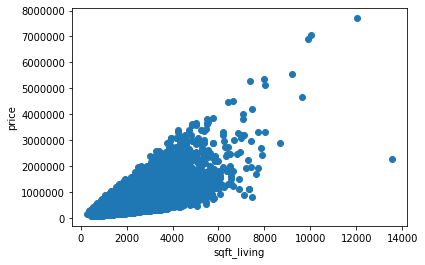

In [4]:
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.scatter(x=df["sqft_living"], y=df["price"])

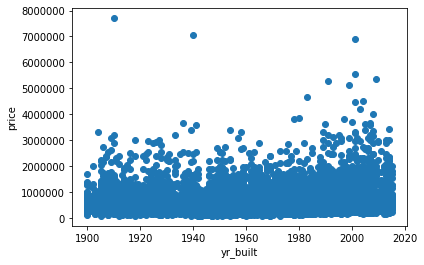

In [5]:
plt.xlabel("yr_built")
plt.ylabel("price")
plt.scatter(x=df["yr_built"], y=df["price"])

In [6]:
X = df.loc[:, ["sqft_living", "yr_built"]]
y = df.loc[:, "price"]

In [7]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()
linear_model.fit(X, y)

print("""
intercept: %.2f
sqft_living:    %.2f
yr_built:    %.2f
""" % (tuple([linear_model.intercept_]) + tuple(linear_model.coef_)))


intercept: 4545840.77
sqft_living:    304.57
yr_built:    -2353.73



## Bootstrapping the Observations

In [8]:
def simple_resample(n): 
    return(np.random.randint(low = 0, high = n, size = n))

def bootstrap(boot_pop, statistic, resample = simple_resample, replicates = 10000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates

In [9]:
def sqft_coeff(data_array):
    X = data_array[:, 1:]
    y = data_array[:, 0]
    
    linear_model = lm.LinearRegression()
    model = linear_model.fit(X, y)
    theta_sqft = model.coef_[1]

    return theta_sqft

data_array = df.loc[:,  ["price", "yr_built", "sqft_living"]].values

theta_hat_sampling = bootstrap(data_array, sqft_coeff)

## Constructing a Confidence Interval

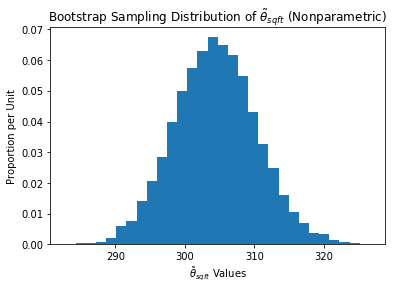

In [10]:
plt.hist(theta_hat_sampling, bins = 30, density = True)
plt.xlabel("$\\tilde{\\theta}_{sqft}$ Values")
plt.ylabel("Proportion per Unit")
plt.title("Bootstrap Sampling Distribution of $\\tilde{\\theta}_{sqft}$ (Nonparametric)");
plt.savefig('bt.svg', format='svg', dpi=1200, bbox_inches="tight")
plt.show()

In [11]:
np.percentile(theta_hat_sampling, 2.5), np.percentile(theta_hat_sampling, 97.5)

(293.00726778644975, 316.45040166379727)